<a href="https://colab.research.google.com/github/emm-gl/MNA_Referenz/blob/main/AS_GradienteDescendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jueves 10 Oct 2023

Auto estudio: El gradiente descendente es un método de optimización de modelos que sirve para aprendizaje de máquina (Machine Learning), con esto podemos hacer lo siguiente:
1. Comprobar que los parámetros de nuestro modelo son los que dan el error mínimo.




In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym       #Cálculo símbolico de Python
from sklearn.linear_model import LinearRegression

#Creación del modelo lineal

In [26]:
#Datos que muestran los salarios de personas respecto a sus anios de experiencia, se creará un modelo de regresión lineal para poder hacer predicciones:

# Variable independiente
experiencia = np.array([[5], [6], [13]])

# Variable objetivo en miles de pesos
salario = np.array([6.85, 16.83, 26.84])


We start by creating an instance of the class, then supply and X (or X's) and a Y (the target) to the fit method. This will create a linear model (equation) for us. Once we have the fit model we can run predictions and score the model to see how well it performs.

In [27]:
# Modelo lineal creado con el método de mínimos cuadrados
modelo = LinearRegression().fit(experiencia.reshape(3, -1),
                                salario)

In [28]:
#Recordar que el modelo lineal es una línea recta con la función y = mx +B
#A continuación los parámetros del modelo:

print("m (pendiente)  %0.2f: " % modelo.coef_[0])
print("b (intercepto) %0.2f: " % modelo.intercept_)

m (pendiente)  2.10: 
b (intercepto) 0.00: 


Intersección con eje Y (b): 0.00
Pendiente (m): 2.10
Suma de cuadrados de los residuos (RSS): 31.42


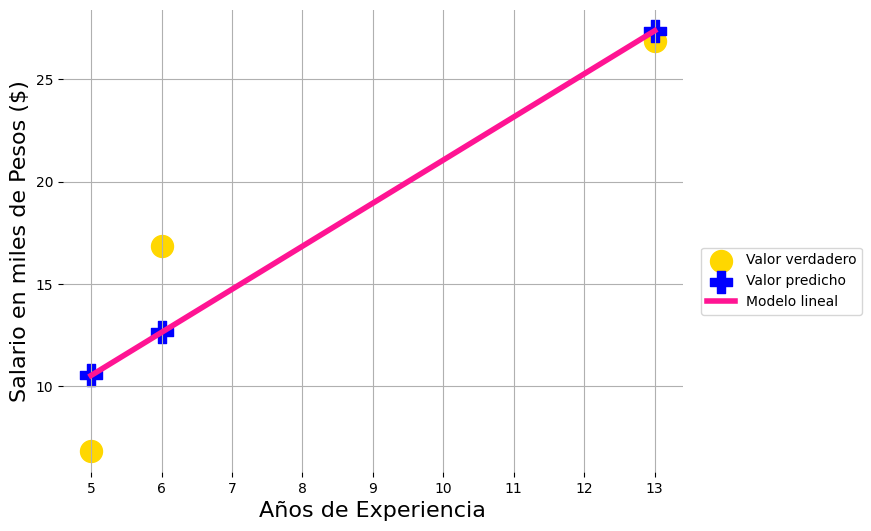

In [29]:
# Visualización de datos y modelo.                                              <-----------------------------Estudiar visualización con Python para AI, DS
print("Intersección con eje Y (b): %0.2f" % modelo.intercept_)                  #<--- Se accede a la propiedad intercept del objeto modelo para la intercepción con el eje Y
print("Pendiente (m): %0.2f" % modelo.coef_[0])                                 #<--- Se accede a la propiedad coef del objeto modelo para la pendiente
print("Suma de cuadrados de los residuos (RSS): %0.2f" %                        # Se agrega la función de RSS, la cual suma el error (residuo) de la función: Residual sum squares
      ((salario - modelo.predict(experiencia))**2).sum())                       #<----Notese que ya se está usando el modelo para predecir los valores! modelo.predict()

plt.figure(figsize=(8, 6))

plt.scatter(experiencia, salario, color="gold", s=250,
            marker="o", label="Valor verdadero")

plt.scatter(experiencia, modelo.predict(experiencia),
            color="blue", s=250, marker="P", label="Valor predicho")

plt.plot(experiencia, modelo.predict(experiencia),
         linewidth=4, color="deeppink", label="Modelo lineal")

experiencia = experiencia.reshape(3)

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de Experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

El modelo calculado por la libreria Sklearn es:

y = 2.1 x

Salario = 2.1 (experiencia).  --> Experiencia en anios

Este modelo tiene un RSS de 31.42

#Diferentes modelos con diferentes pendientes:

In [30]:
# Creación de múltiples pendientes para exploración
pendientes = np.arange(2.5, 1.6, -0.1)

# Vector para almacenar el error de los diferentes modelos
errores = np.array([])


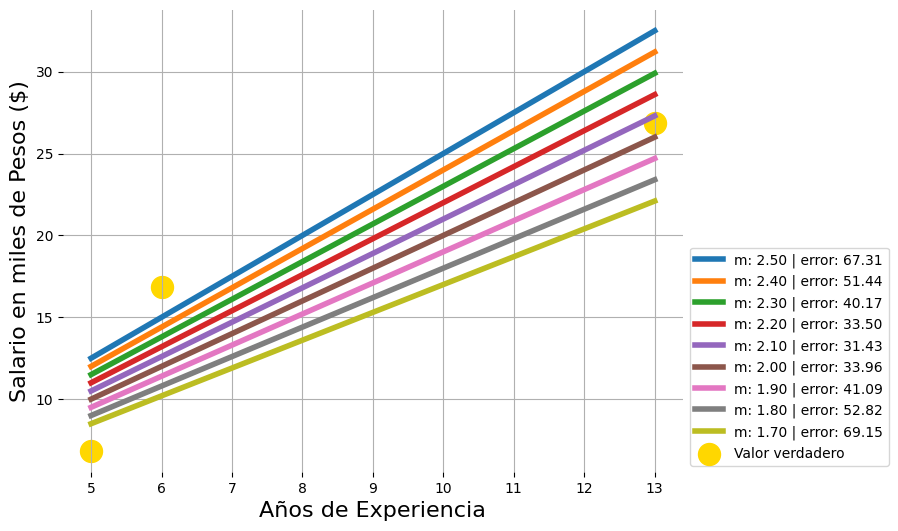

In [31]:
# Visualización de modelos

plt.figure(figsize=(8, 6))

for pendiente in pendientes:
    # Error del modelo (suma de cuadrados de los residuos)
    error = ((pendiente*experiencia - salario)**2).sum()

    # Visualización de un modelo para una pendiente dada
    plt.plot(experiencia, pendiente*experiencia, linewidth=4,
             label="m: %0.2f | error: %0.2f" %
            (pendiente, error))

    errores = np.append(errores, error)

plt.scatter(experiencia, salario, color="gold", s=250,
            marker="o", label="Valor verdadero")

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de Experiencia", size=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
plt.box(False)
plt.show()

En las pasadas gráficas, se tienen varios modelos calculados (diferentes pendientes), y se calcula su RSS para ver su desempenio.

**Recordar que a menor RSS el modelo se ajusta de menor manera a los datos reales y es más certero.**

#Visualización de los errores:

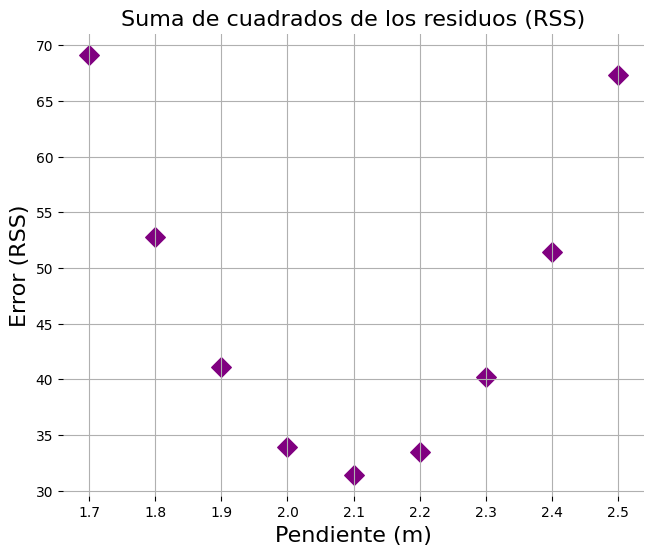

In [32]:
plt.figure(figsize=(7.5, 6))
plt.title("Suma de cuadrados de los residuos (RSS)", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("Pendiente (m)", size=16)
plt.scatter(pendientes, errores, color="purple", marker="D", s=99)
plt.grid()
plt.box(False)
plt.show()

#Función de Error a ser Minimizada
Encontrar el error menor

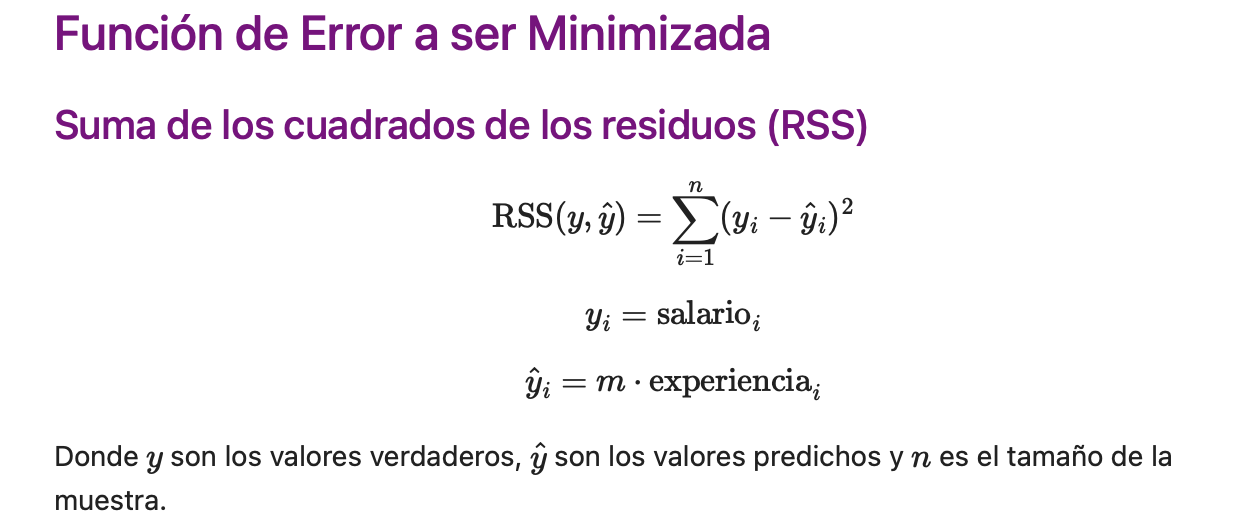

In [33]:
# persona1: (6.85, 5) persona2: (16.83, 6) persona3: (26.84, 13)

m = sym.Symbol("m")       #Usando Python Simbolico: Simpy

# Función de error
error = (6.85 - m*5)**2 + (16.83 - m*6)**2 + (26.84 - m*13)**2

# Derivada de la función de error
derivada = sym.diff(error, m)

for pendiente in pendientes:
    print(derivada, "Evaluación %0.2f" % derivada.evalf(subs={m: pendiente}))

460.0*m - 968.3 Evaluación 181.70
460.0*m - 968.3 Evaluación 135.70
460.0*m - 968.3 Evaluación 89.70
460.0*m - 968.3 Evaluación 43.70
460.0*m - 968.3 Evaluación -2.30
460.0*m - 968.3 Evaluación -48.30
460.0*m - 968.3 Evaluación -94.30
460.0*m - 968.3 Evaluación -140.30
460.0*m - 968.3 Evaluación -186.30


En lo anterior se obtiene la función error, de ahí se deriva la función error y se evalua el valor de la pendiente, el valor que nos dé nos dirá que tan "plana"o la razón de crecimiento es la función con esa pendiente.

**A un valor cercano o igual a cero, significa que tendremos valores optimos, teniendo el error cercano a cero del modelo**

#Visualizando - Derivada de la función de Error

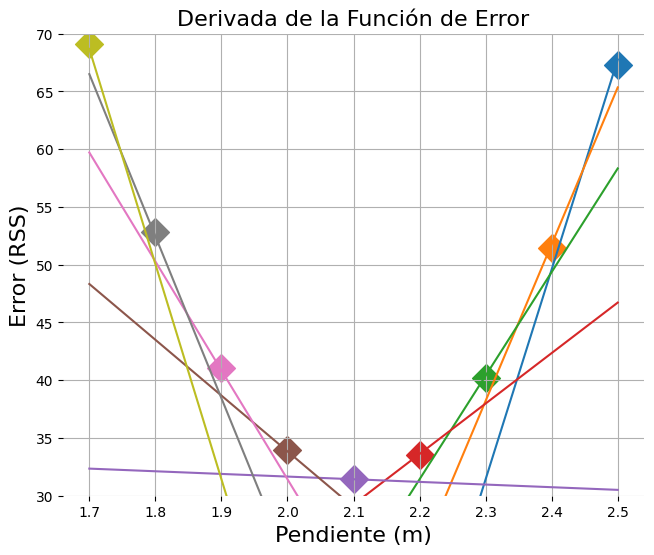

In [34]:
plt.figure(figsize=(7.5, 6))

for i in range(0, len(errores), 1):
    # Error de un modelo dado
    plt.scatter(pendientes[i], errores[i],
                label="%0.2f" % derivada.evalf(subs={m: pendientes[i]}),
                marker="D", s=200)

    # Evaluación de la derivada para un error dado
    pendiente = derivada.evalf(subs={m: pendientes[i]})

    plt.plot(np.array([1.7, 2.5]),
             np.array([1.7, 2.5])*pendiente +
             pendiente*(-2.3 + i*0.05) + errores.min())

plt.title("Derivada de la Función de Error", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("Pendiente (m)", size=16)
plt.ylim(30, 70)
plt.grid()
plt.box(False)
plt.show()